# 03. PyTorch Computer Vision

### Contents 

0. Computer vision libraries 

1. Load dataset - we'll start with FasionMNIST

2. Prepare dataset - We've got some images, we'll start with `DataLoader`

3. Model 0: Building a baseline model with loss function , optimizer etc

4. Making predictions and evaluating the model.

5. Setup device agnostic code

6. Model 1 adding non-linearity 

7. Model 2 Convolutional Neaural Network (CNN)

8. Comparing our models

9. Evaluating our best model

10. Making confusn matrix and save/load the model 

### 0.Computer Vision Libraries in PyTorch

- `torchvision` the core of PyTorch computer vision, contains models, datasets, transformations etc
- `torchvision.datasets` here we'll find a lot of datasets, also contains a series of classes/functions to make datasets.
- `torchvision.models` contains well performing computer vision models, architectures implemented in PyTorch.
- `torchvision.transforms` used for image level transformations like augmentations etc
- `torch.utils.data.Dataset` base dataset class in PyTorch
- `torch.util.data.DataLoader` create an iterable over dataset.

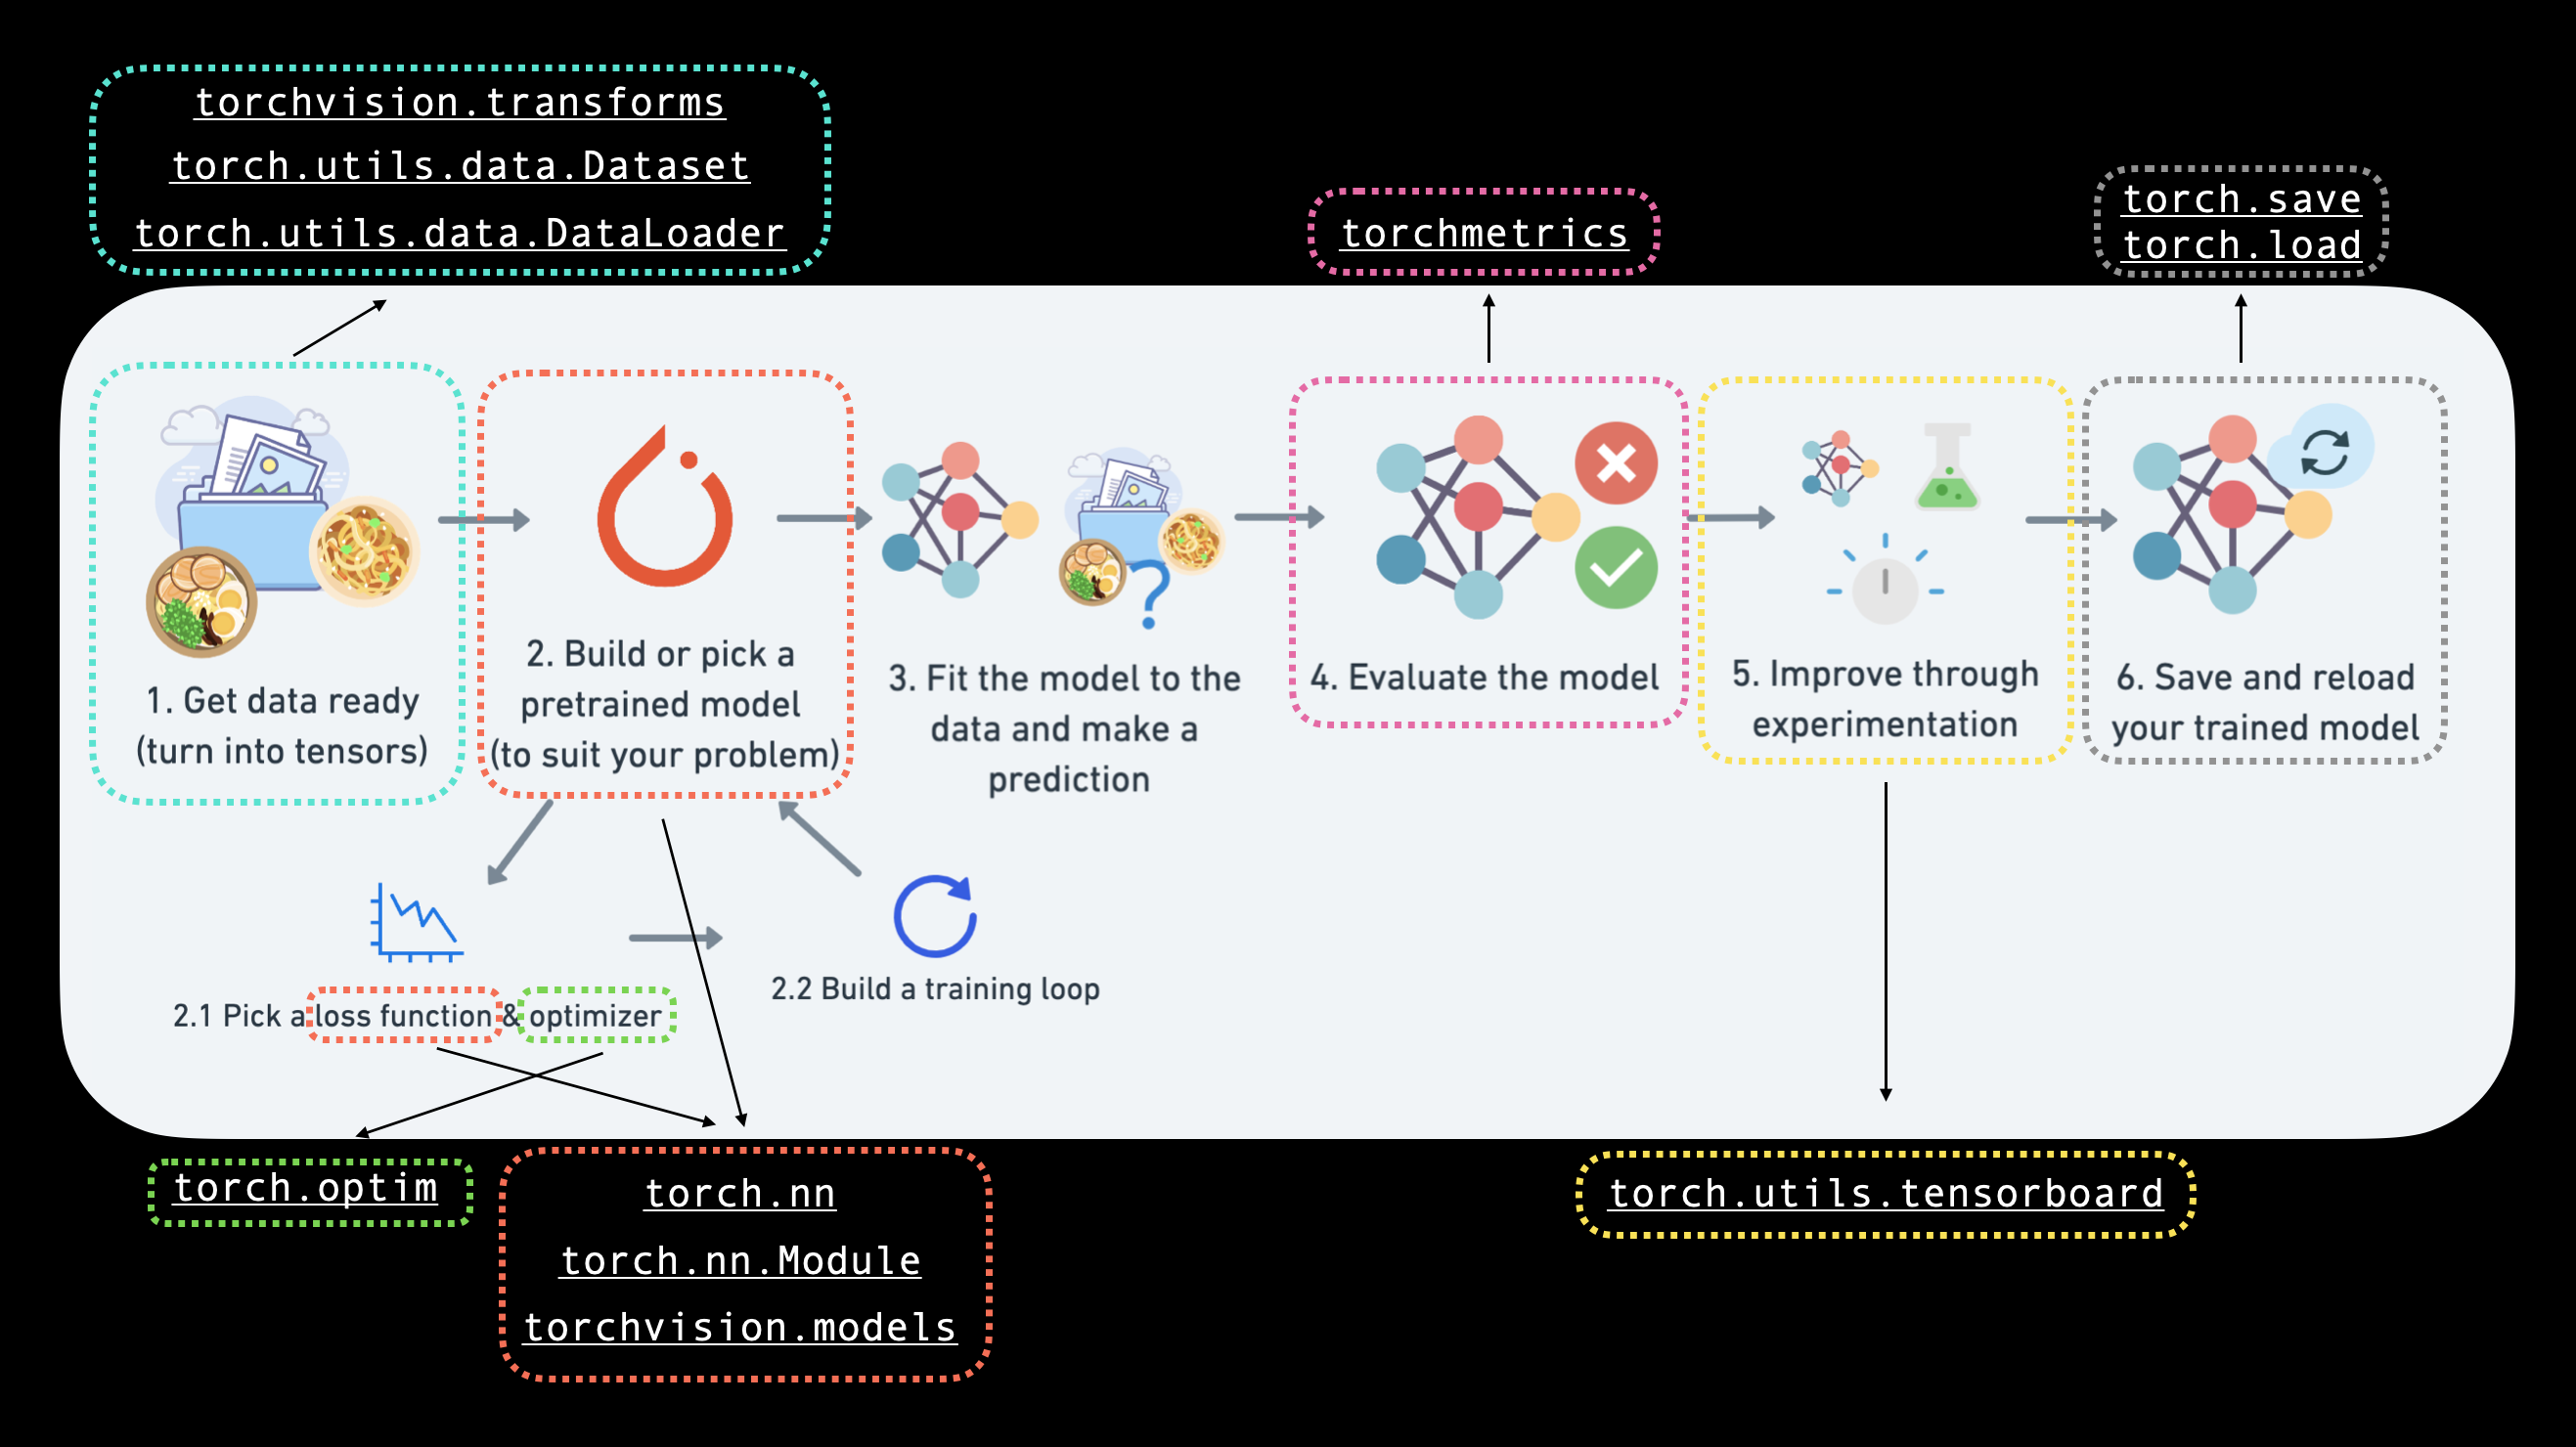

In [1]:
# Import torch libraries 
import torch 
from torch import nn 

# Import Vision libraries
import torchvision 
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt 

print(f"PyTorch version: {torch.__version__}",f"torchvision version: {torchvision.__version__}")

PyTorch version: 2.1.2+cu118 torchvision version: 0.16.2+cu118


### 1.Getting started 

Downloading FasionMNIST to root dairectory and start coding...

FasionMNIST contain 10 different classes of clothing materials in greyscale. The dataset is available in `torchvision.datasets`. 

`torchvision.dataset.FasionMNIST()` to download we provide. 
- `root : str ` = root dairectory 
- `train: bool` = wether we need train data or test data
- `download: bool` = wether to download or load from local 
- `transform: torchvision.transform` = what kind of transformation to use.
- `target_transform` = to transform labels (if needed)

In [2]:
# set training data
train_data = datasets.FashionMNIST(
    root='D:\\Coding_Stuff\\GitHub\\ZTM-PyTorch\\datasets\\FasionMNIST',
    download=False,
    train=True,
    transform=ToTensor(),
    target_transform=None
)

# set test data
test_data = datasets.FashionMNIST(
    root="D:\\Coding_Stuff\\GitHub\\ZTM-PyTorch\\datasets\\FasionMNIST",
    download=False,
    train=False,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
image, label = train_data[0]
image [:,:5], label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: D:\Coding_Stuff\GitHub\ZTM-PyTorch\datasets\FasionMNIST
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: D:\Coding_Stuff\GitHub\ZTM-PyTorch\datasets\FasionMNIST
     Split: Test
     StandardTransform
 Transform: ToTensor())

**1.1 input and output shapes of a computer vision model**

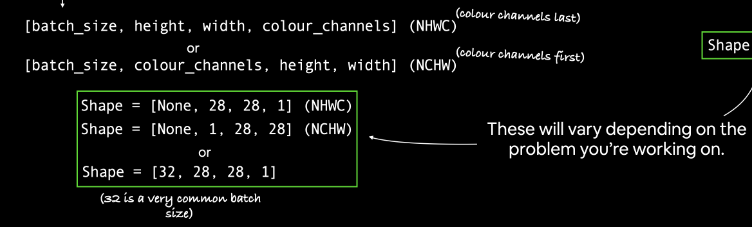

In [5]:
# how many samples ?
len(train_data), len(test_data), image.shape

(60000, 10000, torch.Size([1, 28, 28]))

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

**1.2 Visualizing  our data**

Image shape :torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

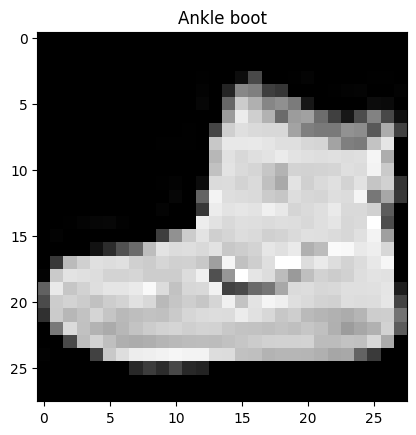

In [7]:
import matplotlib.pyplot as plt 
image, label = train_data[0]
print(f"Image shape :{image.shape}")
plt.imshow(image.squeeze(), cmap="grey")
plt.title(class_names[label])

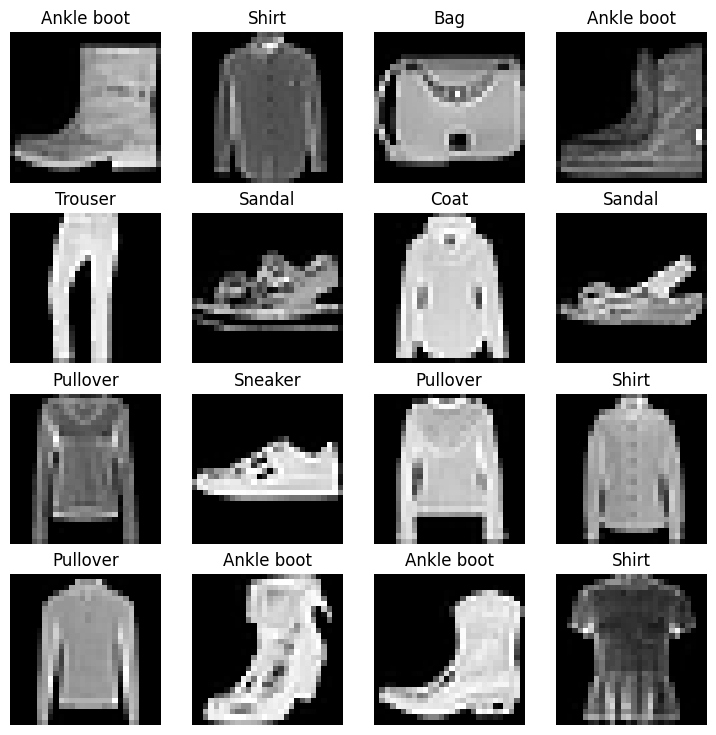

In [8]:
# subplots 

torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4

for i in range(1, rows*cols +1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="grey")
    plt.title(class_names[label])
    plt.axis(False)

### 2. Prepare Data Loader 

Nxt step is to convert the tensor dataset into an python iterable using the `torchvision.utils.data.DataLoader`.

It can convert large datasets into small batches called **mini-batches**.

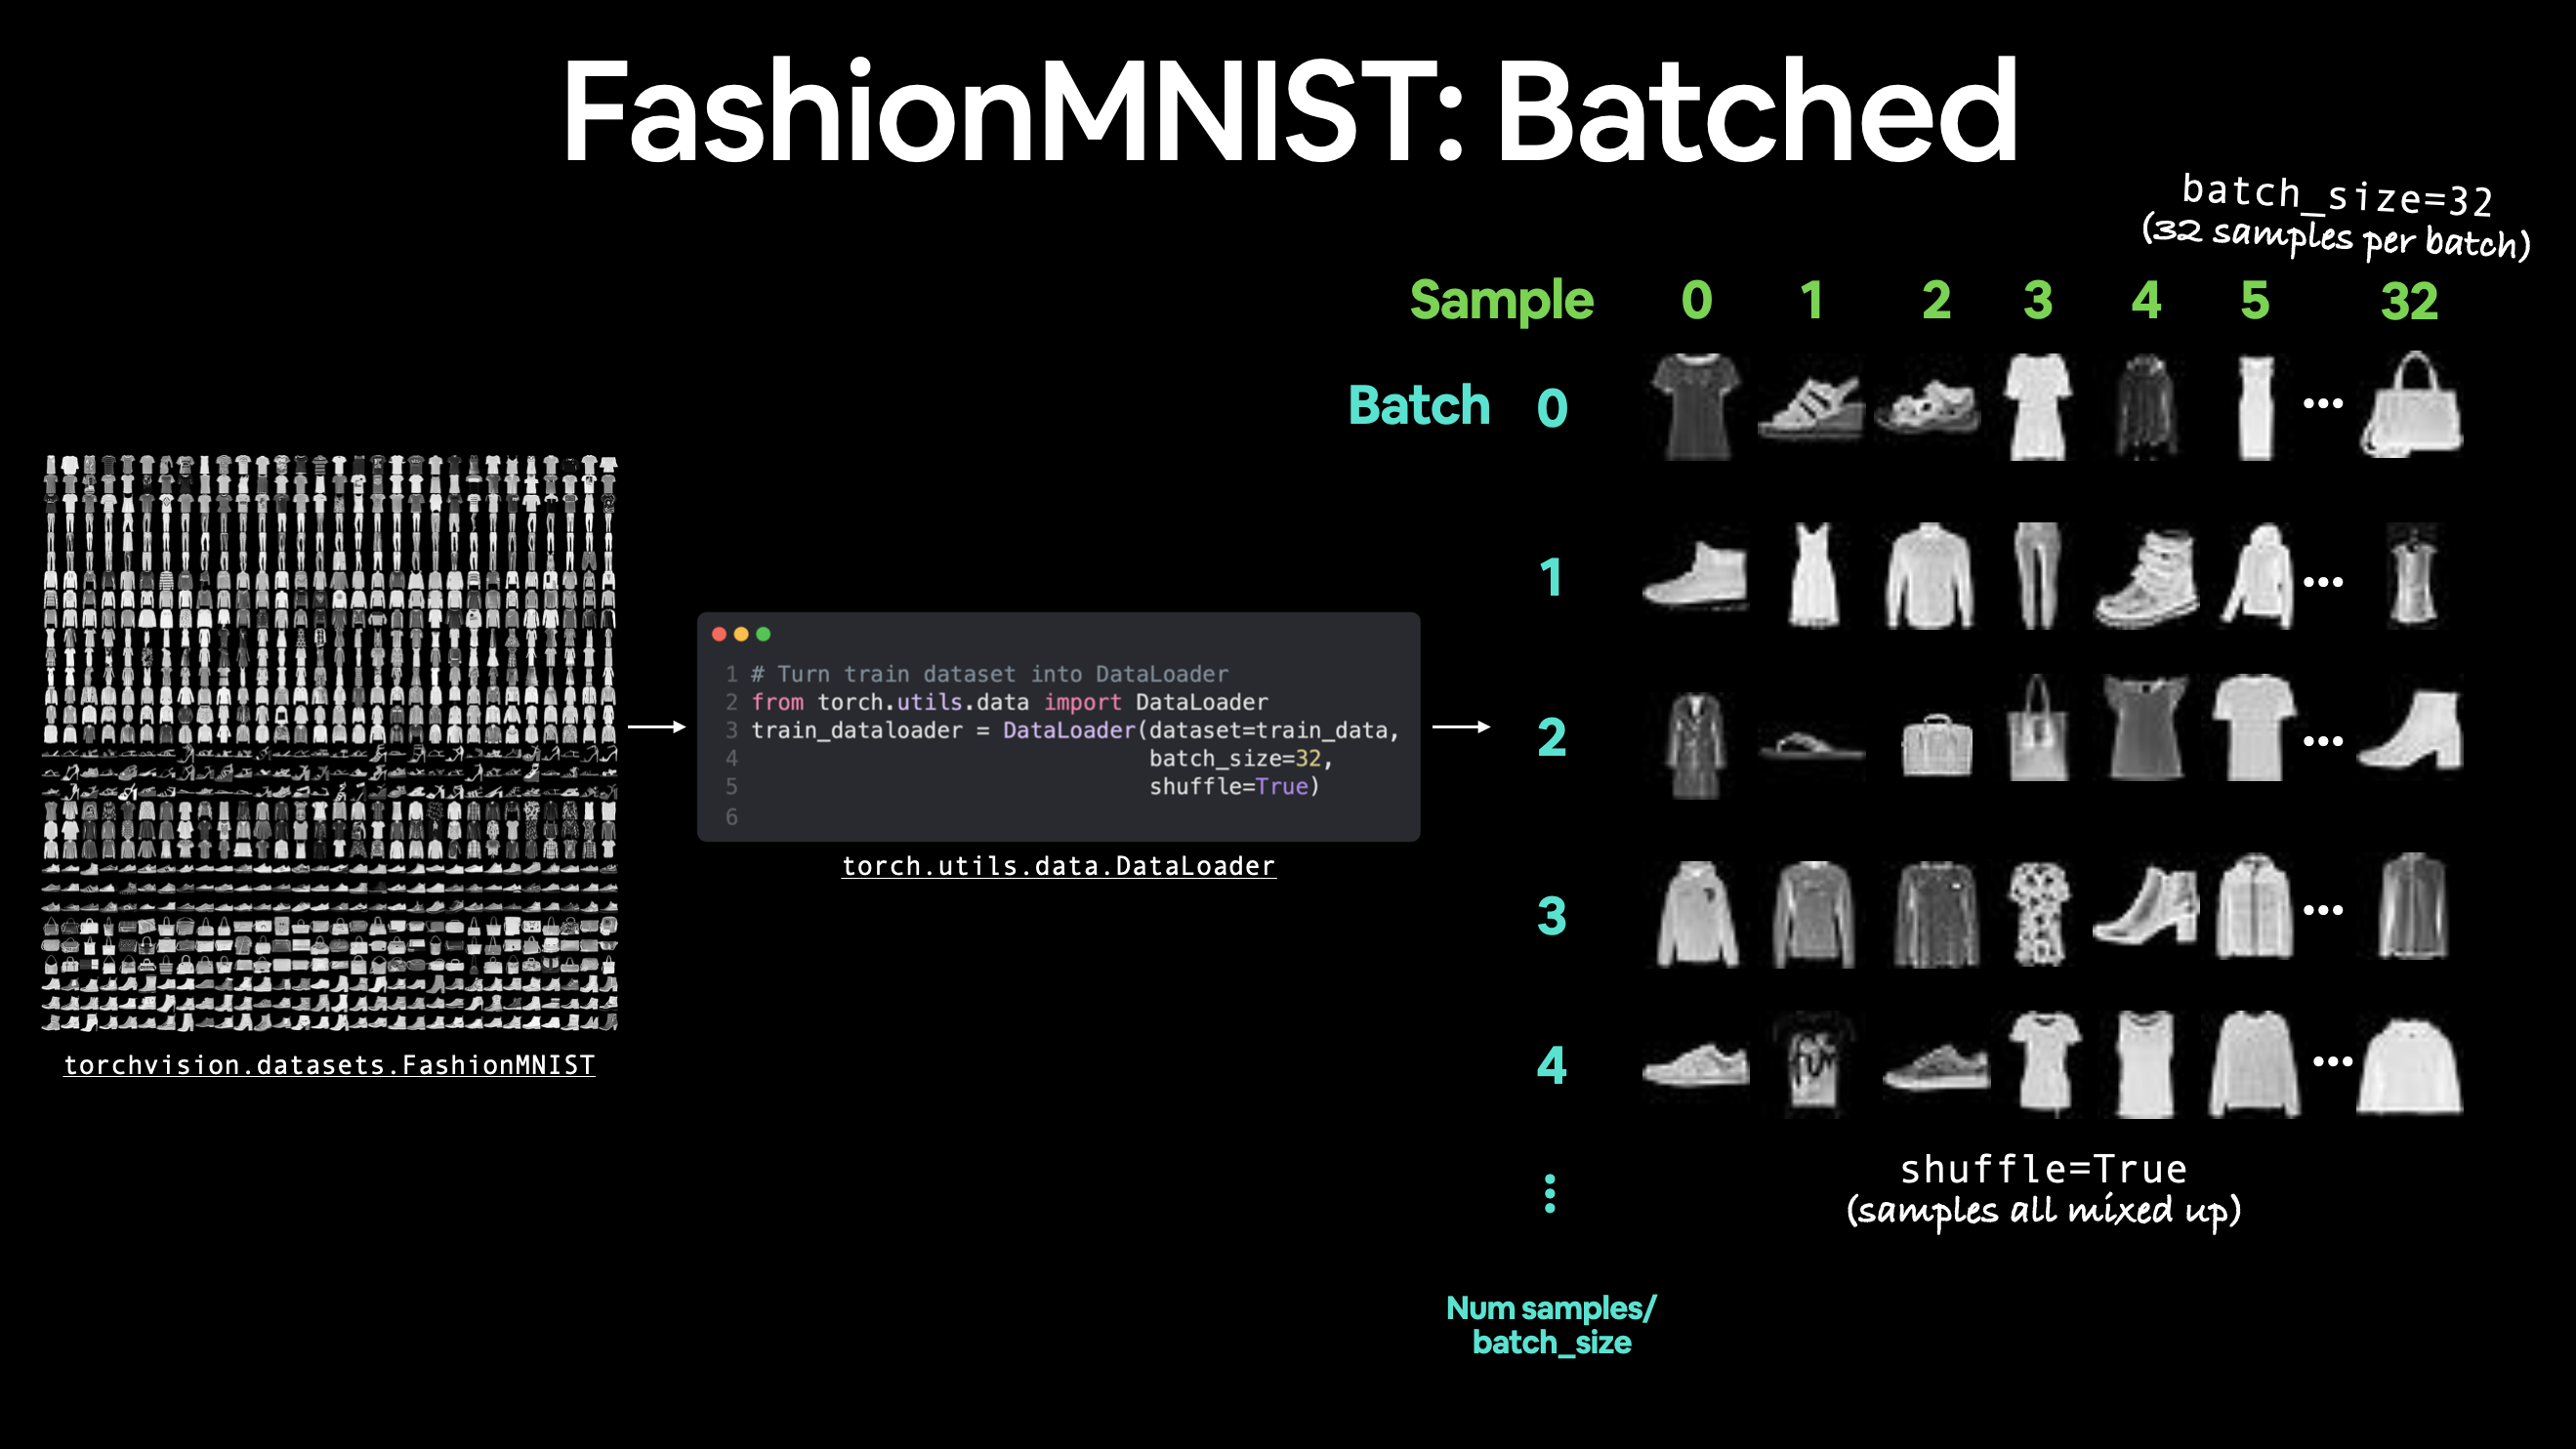

In [9]:
from torch.utils.data import DataLoader

# Setup batch size 
BATCH_SIZE = 32

# Turn dataset into iterable 

train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001F864D43790>, <torch.utils.data.dataloader.DataLoader object at 0x000001F8648A3BE0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [10]:
# show manual sample 
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

### 3. Building a Baseline Model

A simple linear layer, but this time we're adding the `nn.Flatten()` layer with the `nn.Linear()` layers because it's image data and we need to compress it on single vector space.

In [11]:
from torch import nn 

class FasionMNISTModelV0(nn.Module):
    def __init__(self, hidden_units:int, input_shape:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

`nn.Flattern()` took our input shape from `[color_channel, height, width]` to `[color channel, height*width]`. 

- `input shape = 784` 
- `hidden units = 10`
- `output shape = len(class_names)`

In [12]:
torch.manual_seed(42)

# Need to setup model with input params 
model_0 = FasionMNISTModelV0(input_shape=784,
                             hidden_units=10,
                             output_shape=len(class_names))

model_0.to('cpu')

FasionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

**3.1 Setup loss, optimizer and evaluation metrics**

In [13]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.1)

**3.2 creating a timer function**

This time we'll create a timer function to measure the difference in time CPU vs GPU. 

using the `timeit.default_timer()`

In [14]:
from timeit import default_timer as timer 

def print_train_time(start: float, end: float,
                      device:torch.device = None):
    """Print difference in start time and end time.
    
    Args:
        start (float): Start the time of computation.
        end (float): End time of computation.
        device ([type, optional]): Device that computre running on.
        
    Returns: 
        float: time b/w start and end time.
        """
    total_time = start-end
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time


**Creating a training loop & training.**

In [15]:
from tqdm.auto import tqdm

# set the seed and start timer 
torch.manual_seed(42)
train_time_start_onCPU = timer()

# set the number of epochs 
epochs = 3

# Training and testing loop

for epoch in range(epochs):
    print(f"Epoch: {epoch}\n -------")
    # Training
    train_loss = 0

    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        # Forward pass
        y_pred = model_0(X)

        # Calculate loss 
        loss = loss_fn(y_pred, y)
        train_loss += loss 

        # Optimizer zerograd 
        optimizer.zero_grad()
        # backprop
        loss.backward()
        # stepping 
        optimizer.step()

        # print what's happening 
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")

        # divide the train loss to convert it to per-batch 
        train_loss /= len(train_dataloader)

    ### Testing 
    test_loss,test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:

            # forward pass
            test_pred = model_0(X)

            #loss and accuracy
            test_loss += loss_fn(test_pred,y)
            test_acc += accuracy_fn(y_true=y, y_pred = test_pred.argmax(dim=1))

        # Calculations on test should happen on torch.infernece mode 
        # Convert all metrics to batch size 
        
        test_acc /= len(test_dataloader)
        test_loss /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate the trainig time 
train_time_end_onCPU = timer()
total_trainTime_model0 = print_train_time(start=train_time_start_onCPU,
                                          end = train_time_end_onCPU,
                                          device=str(next(model_0.parameters()).device))

Epoch: 0
 -------
Looked at 0 / 60000 samples


c:\Users\kaila\Learning\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.00025 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
 -------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.00032 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
 -------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.00017 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: -33.159 seconds


### 4.Make predictions & get Model 0 results

In [16]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """

    loss,acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            # Make predictions
            y_pred = model(X)

            # accumilate the loss
            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true=y,
                               y_pred = y_pred.argmax(dim=1))
            
        # Scaling the acc and loss for batch 
    
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,# only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc":acc
    }

# Calculate model 0 results
model_0_results = eval_model(model=model_0, 
                             data_loader=test_dataloader,
                             loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FasionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [17]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu" 
device

'cuda'

### 5. Model1: Building better with Non-Linearity 

In [18]:
class FasionMNISTModelV1(nn.Module):
    def __init__(self,input_shape:int, output_shape:int,hidden_shape:int):
        super().__init__()
        self.stack_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_shape),
            nn.ReLU(),
            nn.Linear(in_features=hidden_shape,out_features=output_shape),
            nn.ReLU(),
        )

    def forward(self,x):
        return self.stack_layer(x)

In [19]:
torch.manual_seed(42)
model_1 = FasionMNISTModelV1(input_shape=784,
                             hidden_shape=10,
                             output_shape=len(class_names)).to(device)
print(model_1)
print(next(model_1.parameters()).device)

FasionMNISTModelV1(
  (stack_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)
cuda:0


In [20]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

**6.1 Functionizing training & test loops**

In [21]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    
    train_loss, train_acc = 0, 0
    model.to(device)

    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)
        # 1. Forward pass
        y_pred = model(X)
        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        # 4. Loss backward
        loss.backward()
        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)           
            # 1. Forward pass
            test_pred = model(X)
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [22]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.42179 | Train accuracy: 54.29%


 33%|███▎      | 1/3 [00:12<00:24, 12.28s/it]

Test loss: 1.12168 | Test accuracy: 62.15%

Epoch: 1
---------
Train loss: 1.03359 | Train accuracy: 64.61%


 67%|██████▋   | 2/3 [00:24<00:12, 12.47s/it]

Test loss: 1.00019 | Test accuracy: 64.48%

Epoch: 2
---------
Train loss: 0.95996 | Train accuracy: 66.05%


100%|██████████| 3/3 [00:37<00:00, 12.52s/it]

Test loss: 0.96338 | Test accuracy: 65.41%

Train time on cuda: -37.559 seconds


In [23]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FasionMNISTModelV1',
 'model_loss': 0.9633837938308716,
 'model_acc': 65.40535143769968}

### 6. Model 2: Building CNNs

Building TinyVGG from CNN Explainer. It follows the format

`input_layer -> [convolutional_layer + activation_layer + pooling_layer] -> output_layer`

where the content `[convolutional_layer + activation_layer + pooling_layer]` (the conv block )can be repeated few times to build larger networks. 

In [45]:
class FasionMNISTModelV2(nn.Module):
    """
    Model architecture that replicate the TinyVGG
    model from cnn explainer website
    """
    def __init__(self,input_shape:int, hidden_shape:int, output_shape:int):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_shape,
                      kernel_size=3,
                      stride=1,
                      padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_shape,
                  out_channels=hidden_shape,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_shape,
                      out_channels=hidden_shape,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_shape,
                      out_features=output_shape))
        
        def forward(self,x):
            x = self.conv_block1(x)
            print(x.shape)
            x = self.conv_block2(x)
            print(x.shape)
            x = self.classifier(x)
            return x
       
model_2 = FasionMNISTModelV2(input_shape=1, 
                             hidden_shape=10,
                             output_shape=len(class_names)).to(device)

In [43]:
image.shape

torch.Size([1, 28, 28])